<a href="https://colab.research.google.com/github/SwathiNagilla/Swathi_INFO5731_FALL2024/blob/main/Nagilla_swathi_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [22]:
# Write your code here

!pip install bertopic


import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from bertopic import BERTopic

# Load the dataset
file = "annotated_sentiment_data.csv"
data = pd.read_csv(file)

# Preprocess the text
documents = data['Cleaned_Abstract'].fillna("").tolist()

# Feature representation (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# 1. LDA for Topic Modeling
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda_model.fit_transform(tfidf_matrix)

# Display top words per topic for LDA
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}: ",
              [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])

print("\nLDA Topics:")
display_topics(lda_model, tfidf_vectorizer.get_feature_names_out(), 10)

# 2. LSA for Topic Modeling
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_topics = lsa_model.fit_transform(tfidf_matrix)

# Display top words per topic for LSA
print("\nLSA Topics:")
display_topics(lsa_model, tfidf_vectorizer.get_feature_names_out(), 10)

# 3. BERTopic for Topic Modeling
bertopic_model = BERTopic()
topics, probs = bertopic_model.fit_transform(documents)

# Get top 10 topics and their summaries
print("\nBERTopic Topics:")
top_topics = bertopic_model.get_topics()
for topic_id, words in list(top_topics.items())[:10]:
    print(f"Topic {topic_id}: {words}")

# Summarize and Describe Each Cluster
Final = bertopic_model.get_topic_info()
print("\nTopic Summaries:")
print(Final.head(10))





LDA Topics:
Topic 1:  ['ontolog', 'veget', 'oecd', 'patent', 'invers', 'wind', 'emphas', 'geometri', 'nurs', 'trait']
Topic 2:  ['forecast', 'le', 'molecular', 'descriptor', 'consum', 'food', 'induct', 'pollut', 'count', 'bioinformat']
Topic 3:  ['ml', 'tutori', 'bdk', 'manipul', 'explos', 'kdd', 'unifi', 'interdisciplinari', 'conserv', 'disast']
Topic 4:  ['eo', 'outbreak', 'infrar', 'gaia', 'telescop', 'sky', 'stress', 'lsst', 'embed', 'mapreduc']
Topic 5:  ['narr', 'grid', 'think', 'protocol', 'sdi', 'member', 'escienc', 'ocean', 'authent', 'loss']
Topic 6:  ['lesson', 'spatiotempor', 'ml', 'microbiom', 'ligo', 'enterpris', 'interdisciplinari', 'datamin', 'maker', 'phd']
Topic 7:  ['data', 'scienc', 'research', 'use', 'analysi', 'model', 'big', 'method', 'comput', 'inform']
Topic 8:  ['symbol', 'composit', 'st', 'stanford', 'invers', 'deficit', 'mapreduc', 'consum', 'know', 'cancer']
Topic 9:  ['fair', 'atmospher', 'prospect', 'score', 'assimil', 'al', 'corpor', 'et', 'surfac', 'or

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [21]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file = "annotated_sentiment_data.csv"
data = pd.read_csv(file)

# Features and Labels
X = data['Cleaned_Abstract'].fillna("")
y = data['sentiment']

# Feature Extraction: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Train-Test Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize Models
Lregresssion = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Cross-Validation (5-fold)
Lregresssion_cv = cross_val_score(Lregresssion, X_train, y_train, cv=5, scoring='accuracy')
rf_cv = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Logistic Regression Cross-Validation Accuracy: {Lregresssion_cv.mean():.4f}")
print(f"Random Forest Cross-Validation Accuracy: {rf_cv.mean():.4f}")

# Train Models
Lregresssion.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions on Test Set
y_pred_Lregresssion = Lregresssion.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate Models
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

results = {}
for name, metric in metrics.items():
    if name == 'Accuracy':
        results[name] = {
            'Logistic Regression': metric(y_test, y_pred_Lregresssion),
            'Random Forest': metric(y_test, y_pred_rf)
        }
    else:
        results[name] = {
            'Logistic Regression': metric(y_test, y_pred_Lregresssion),
            'Random Forest': metric(y_test, y_pred_rf)
        }

# Convert Results to DataFrame for Better Display
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Logistic Regression Cross-Validation Accuracy: 0.8725
Random Forest Cross-Validation Accuracy: 0.8738

Model Performance Comparison:
           Logistic Regression  Random Forest
Accuracy              0.885000       0.890000
Precision             0.783225       0.882161
Recall                0.885000       0.890000
F1 Score              0.831008       0.842718


I chose TF-IDF (Term Frequency-Inverse Document Frequency) vectorization for feature extraction:

**Reason:**

It considers the importance of terms relative to the total data set.
The emphasis on specific words reduces the weight of general words.
Suitable for high-quality, simple data such as text.

**Model selection**:
Two controlled study samples were selected:

1. Logistic regression regression:

Simple and effective linear model.

It works well with text data converted to vectors.

it is easy to interpret and computationally inexpensive.

2. Random forest classification:

A complex cluster model combining decision trees.

Handle nonlinear relationships effectively.

It is more robust to overfitting compared to single tree models.

**Cross-validation**

A 5-Fold Cross-Validation was performed to check the stability of the performance of each model. Cross-validation divides the data into repeated training and validation sets, and averages the results for reliability.

**Evaluation metrics**:

**Accuracy**:

Measures the proportion of correctly classified samples.

**Precision**:

Fraction of relevant samples among the retrieved instances.

**Recall:**

Measures the ability to find all relevant instances.

**F1 Score:**

Harmonic mean of precision and recall, providing a balanced view.

**Comparison**:

Logistic Regression is a linear model that assumes a straight-line relationship between features and the target variable. It's highly interpretable, making it easier to understand the influence of individual features on predictions. This model works well for text data with linearly separable patterns, is fast to train, and scales efficiently with large datasets. However, it can struggle with complex, non-linear relationships and may not perform as well on highly complex or noisy data.

Random Forest, an ensemble method, combines multiple decision trees to improve prediction accuracy. It excels at capturing non-linear patterns and complex interactions between features, making it more suitable for diverse datasets. While more computationally expensive and slower than logistic regression, it’s less prone to overfitting due to its averaging mechanism across trees. However, it can be harder to interpret, and its performance can degrade with very large datasets if not optimized.

In summary, Logistic Regression is faster and easier to interpret but may not handle complex data well, whereas Random Forest is more powerful for capturing intricate relationships but comes at the cost of increased computational demand and reduced interpretability.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

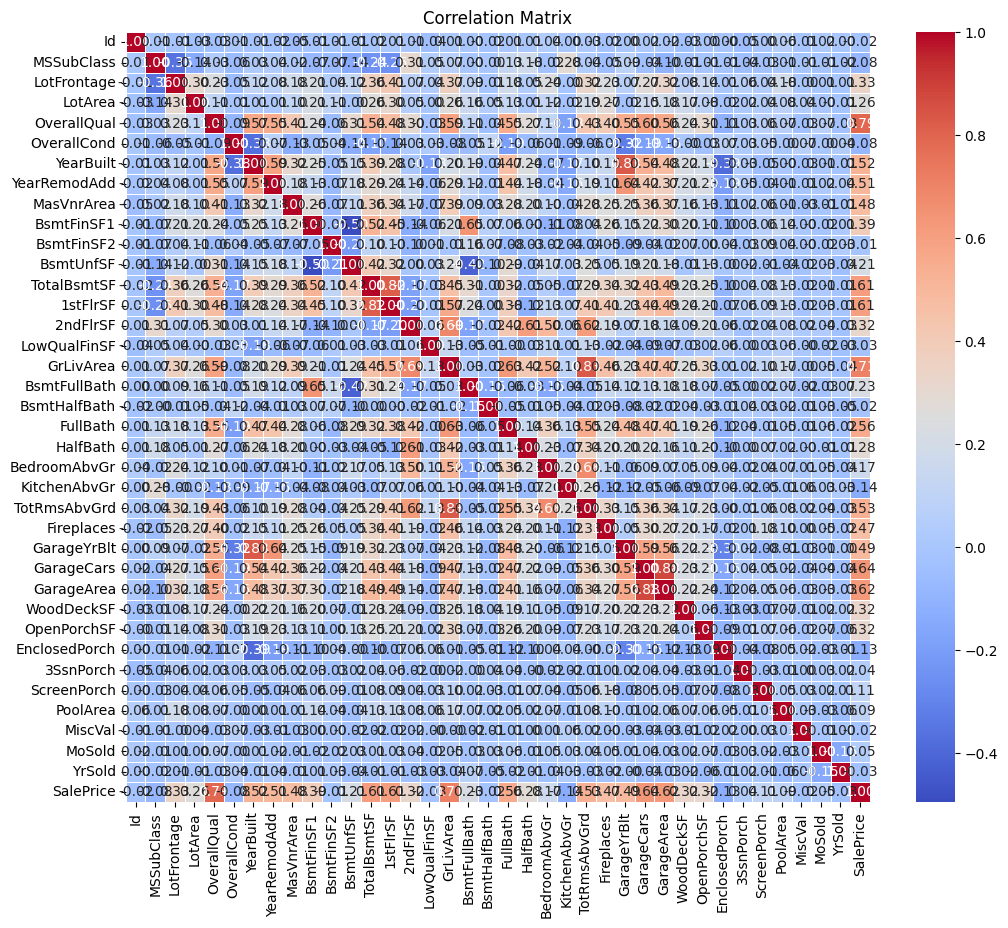

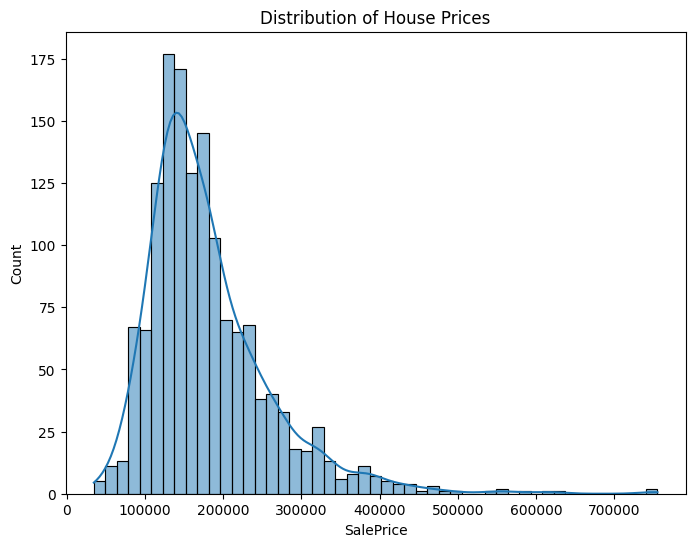

Mean Squared Error (MSE): 1581119650.39
Root Mean Squared Error (RMSE): 39763.30
R-squared: 0.79


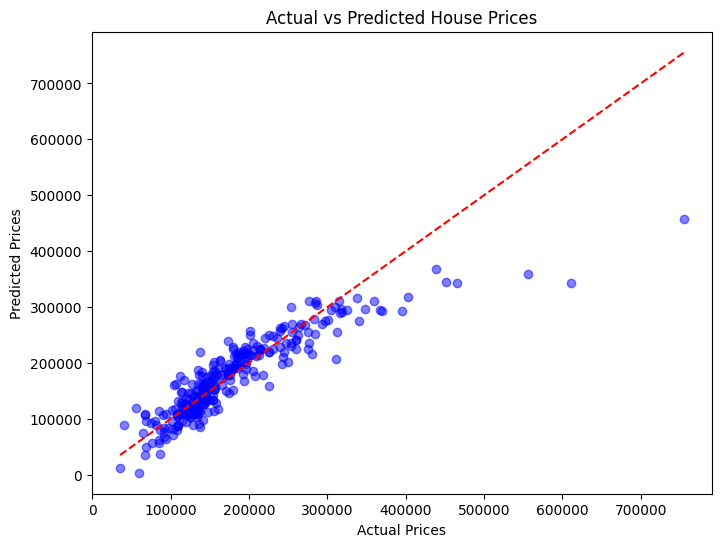

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# first few rows of the training dataset
print(train.head())

# Read the data description file
with open('data_description.txt', 'r') as f:
    description = f.read()

print(description)
print(train.describe())
print(train.isnull().sum())

# drop the Nan values
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())

# drop them
train_cleaned = train.dropna(axis=1, thresh=int(0.7*len(train)))

# Check missing values again
print(train_cleaned.isnull().sum())

train_data_encoded = pd.get_dummies(train_cleaned, drop_first=True)

# Correlation matrix with only numerical columns
numerical_columns = train_data_encoded.select_dtypes(include=[np.number])

# Correlation heatmap to understand relationships between numerical variables
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualize the distribution of the target variable 'SalePrice'
plt.figure(figsize=(8, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

# Select features for the regression model based on the correlation matrix
# selected features
features = ['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'GarageCars']

X = train_data_encoded[features]  # Features
y = train_data_encoded['SalePrice']  # Target variable

# Split the data into training and testing sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error, Root Mean Squared Error, and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualizing the performance of the model with Actual vs Predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [19]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the pre-trained sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Load your data collected in Assignment 3 (e.g., the movie reviews or product reviews)
data = pd.read_csv('annotated_sentiment_data.csv')

# Ensure 'Cleaned_Abstract' is of type string and handle missing values
data['Cleaned_Abstract'] = data['Cleaned_Abstract'].fillna('No content').astype(str)

# Handle missing values in 'sentiment' column (ground truth)
data['sentiment'] = data['sentiment'].fillna('neutral')  # Or drop rows: data = data.dropna(subset=['sentiment'])

# Initialize lists to store predictions and cleaned data for debugging
predictions = []
cleaned_data = []

# Perform sentiment analysis using the pre-trained model
for review in data['Cleaned_Abstract']:
    try:
        # Use a shorter sequence length to prevent exceeding the model's max length
        result = sentiment_analyzer(review[:512])  # Truncate to 512 tokens if necessary
        predictions.append(result[0]['label'])  # 'LABEL_0' for negative, 'LABEL_1' for positive
        cleaned_data.append(review)  # Collect cleaned reviews for verification
    except Exception as e:
        # If there's an error with a review, log it for debugging
        print(f"Error processing review: {review} \nError: {e}")
        predictions.append(None)
        cleaned_data.append(review)

# Convert predictions into the same format as the ground truth (assuming binary labels: 'positive' and 'negative')
data['Predicted_Sentiment'] = predictions

# Check for and handle any unexpected labels in 'sentiment'
data['sentiment'] = data['sentiment'].apply(lambda x: 'neutral' if x not in ['positive', 'negative', 'neutral'] else x)

# Convert 'sentiment' column to binary labels (positive: 1, negative: 0)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0, 'neutral': 0})  # Adjust if needed
data['Predicted_Sentiment'] = data['Predicted_Sentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})  # Model uses uppercase labels

# Drop any rows where either y_true or y_pred is NaN
valid_data = data.dropna(subset=['sentiment', 'Predicted_Sentiment'])

# Ensure valid_data has 700 rows
print(f"Valid rows after removing NaN values: {len(valid_data)}")

# Update y_true and y_pred based on valid data
y_true = valid_data['sentiment']
y_pred = valid_data['Predicted_Sentiment']

assert len(y_true) == len(y_pred), f"Length mismatch: y_true length is {len(y_true)}, y_pred length is {len(y_pred)}"

# Evaluate the metrics only after ensuring the lengths are consistent
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Valid rows after removing NaN values: 1000
Accuracy: 0.89
Precision: 0.07
Recall: 0.02
F1 Score: 0.04
